#### Plots y visualizacion de los datos.

In [1]:
#Importamos la libreria de matplot que nos permite usar subplots.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#Definimos la ruta del archivo y el filename para crear el fullpath.
mainpath = 'G:\Mi unidad\Documentos\Escuela\Antony\Data_Science\python-ml-course\datasets'
filename = 'customer-churn-model/Customer Churn Model.txt'
fullpath = os.path.join(mainpath, filename)
data = pd.read_csv(fullpath)

In [3]:
data.head()

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


In [4]:
#Le indicamos que el plot se genere en la misma celda.
%matplotlib inline 

In [5]:
#Sirve para guardar las imagenes creadas de nuestro dataframe.
#savefig('path_donde_guardar_im.jpeg')

### Scatter Plot (Nubes de disperción)

<AxesSubplot:xlabel='Day Mins', ylabel='Day Charge'>

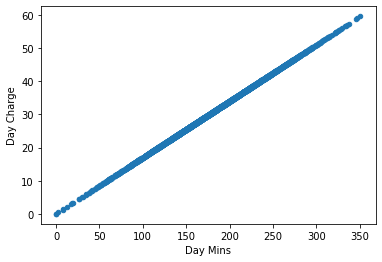

In [6]:
#Dibujamos un plot que relaciona 2 columnas.
data.plot(kind='scatter', x='Day Mins', y='Day Charge')

<AxesSubplot:xlabel='Night Mins', ylabel='Night Charge'>

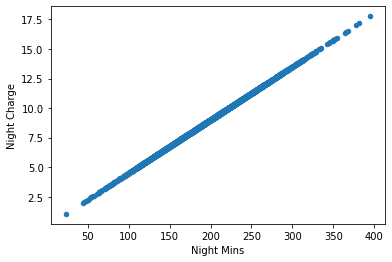

In [7]:
data.plot(kind='scatter', x='Night Mins', y= 'Night Charge')

<AxesSubplot:xlabel='Night Calls', ylabel='Night Charge'>

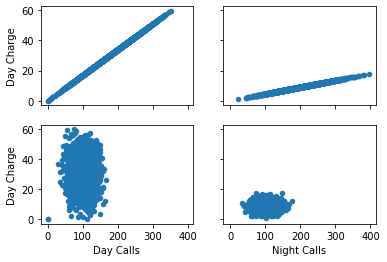

In [8]:
#Creamos una imagen con subplots de 2,2 y le indicamos que compartiran los valores en el eje x como en el eje y. Creamos cada uno de los plots y lo asignamos a una posicion dentro de la figura.
figure, axs = plt.subplots(2,2, sharey=True, sharex=True)
data.plot(kind='scatter', x='Day Mins', y='Day Charge', ax=axs[0][0])
data.plot(kind='scatter', x='Night Mins', y='Night Charge', ax=axs[0][1])
data.plot(kind='scatter', x='Day Calls', y='Day Charge', ax=axs[1][0])
data.plot(kind='scatter', x='Night Calls', y='Night Charge', ax=axs[1][1])

### Histogramas de frecuencia

Text(0.5, 1.0, 'Histograma de numero de llamadas al dia.')

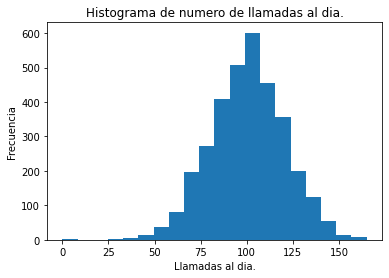

In [9]:
# UN histograma muestra como se distribuye una información numerica. Muestra una visión de donde se ubican los rangos.  
#El parametros bins nos permite definir cuantas columnas se mostraran en el histograma.
plt.hist(data['Day Calls'], bins=20 )
#Creamos las etiquetas para y,x y titulo.
plt.xlabel('Llamadas al dia.')
plt.ylabel('Frecuencia')
plt.title('Histograma de numero de llamadas al dia.')

Text(0.5, 1.0, 'Histograma de numero de llamadas al dia.')

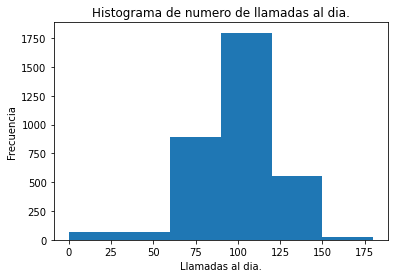

In [10]:
#Histograma definido por divisiones.
plt.hist(data['Day Calls'], bins=[0,60,90,120,150,180])
#Creamos las etiquetas para y,x y titulo.
plt.xlabel('Llamadas al dia.')
plt.ylabel('Frecuencia')
plt.title('Histograma de numero de llamadas al dia.')

###Regla de sturges para saber cuantas divisiones elaborar en un histograma

In [11]:
#Validamos el tamaño de nuestra muestra:
#Obtener el numero de filas que tiene nuestro dataset.
data.shape

(3333, 21)

Text(0.5, 1.0, 'Histograma de numero de llamadas al dia.')

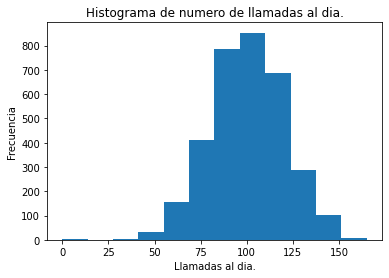

In [12]:
#Importamos la libreria de numpy para poder usar la base logaritmica
#Definimos la funcion logaritmica y asignamos a 'k' el resultado como es un valor float no permite graficarla por lo cual convertimos a entero el valor, aplicamos la form de struger
k = int(1+np.log2(3333))
#Aplicamos a binds el resultado de la formula de sturges para crear las divisiones.
plt.hist(data['Day Calls'], bins= k)
#Creamos las etiquetas para y,x y titulo.
plt.xlabel('Llamadas al dia.')
plt.ylabel('Frecuencia')
plt.title('Histograma de numero de llamadas al dia.')
#El resultado es un diagrama donde nos muestra las llamadas por dia y cuantas veces se encuentra este valor en las filas del df.

#### Boxplot, diagrama de caja y bigotes.

Nos ayuda a entender la distribución de una variable numerica.

Text(0.5, 1.0, 'Boxplot de las llamadas diarias')

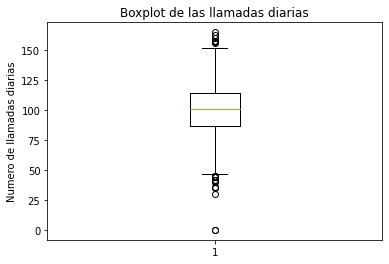

In [13]:
#El diagrama de caja y bigote como su nombre lo dice nos representa la información solo en el eje de las y y nos dibuja en donde se encuentra la mayor información obteniedo los valores de la media, 25% y al 75% para dibujar la caja.
#Creamos un boxplot de Day Calls.
plt.boxplot(data['Day Calls'])
#Asignamos nombre a la etiqueta en y y al title.
plt.ylabel('Numero de llamadas diarias')
plt.title('Boxplot de las llamadas diarias')
#Los valores que estan fuera del bigote se definen como bolitas y se llaman outlayers 

In [14]:
#Verificamos los valores de Day Calls como media, min, max, 25%, 75% que esto nos ayuda a ver donde esta posicionada exactamente el boxplot.
data['Day Calls'].describe()

count    3333.000000
mean      100.435644
std        20.069084
min         0.000000
25%        87.000000
50%       101.000000
75%       114.000000
max       165.000000
Name: Day Calls, dtype: float64

In [15]:
#Para saber el tamaño de la caja que es importante creamos una funcion que reste el valor quantil del 75% - 25% para saber el rango inter-quartilico de nuestro boxplot.
IQR= data['Day Calls'].quantile(0.75)-data['Day Calls'].quantile(0.25)
IQR

27.0

In [16]:
#Sabiendo el rango inter-quartilico de nuestro boxplot podemos saber cual es el valor inferior del bigote usando la formula de quantil al 25% - 1.5* el rango interquartilico.
data['Day Calls'].quantile(0.25) - 1.5*IQR

46.5

In [17]:
#Sabiendo el rango inter-quartilico de nuestro boxplot podemos saber cual es el valor superior del bigote usando la formula de quantil al 75% + 1.5* el rango interquartilico.
data['Day Calls'].quantile(0.75) + 1.5*IQR

154.5